## SciPy
The SciPy library is one of the core packages that make up the SciPy stack. It provides many user-friendly and efficient numerical routines such as routines for numerical integration and optimization.

Library documentation: http://www.scipy.org/scipylib/index.html

In [62]:
# needed to display the graphs
%matplotlib inline
from pylab import *

In [63]:
from numpy import *
from scipy.integrate import quad, dblquad, tplquad

In [64]:
# integration
val, abserr = quad(lambda x: exp(-x ** 2),  Inf, Inf)
val, abserr

(0.0, 0.0)

In [65]:
from scipy.integrate import odeint, ode

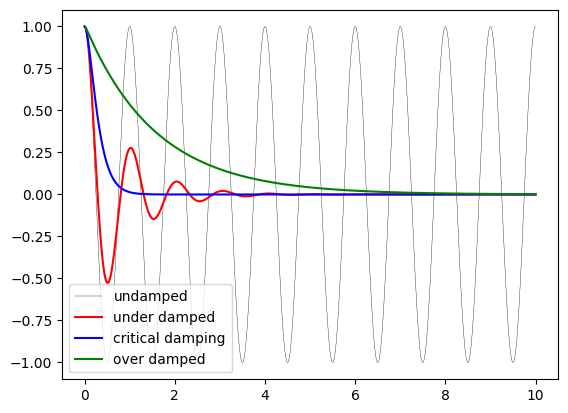

In [66]:
# differential equation
def dy(y, t, zeta, w0):
    x, p = y[0], y[1]
    
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x

    return [dx, dp]

# initial state
y0 = [1.0, 0.0]

# time coodinate to solve the ODE for
t = linspace(0, 10, 1000)
w0 = 2*pi*1.0

# solve the ODE problem for three different values of the damping ratio
y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

fig, ax = subplots()
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

In [67]:
from scipy.fftpack import *

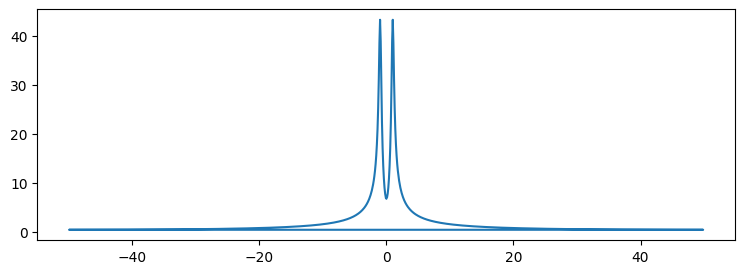

In [68]:
# fourier transform
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

fig, ax = subplots(figsize=(9,3))
ax.plot(w, abs(F));

## Linear Algebra

In [69]:
A = np.eye(3)
A += 0.01
b = array([1,2,3])
x = solve(A, b)
print(x)

[0.94174757 1.94174757 2.94174757]


In [70]:
# eigenvalues and eigenvectors
A = rand(3,3)
B = rand(3,3)

evals, evecs = eig(A)

evals

array([ 1.33297029,  0.34041635, -0.08978224])

In [71]:
evecs


array([[-0.5197526 , -0.86385132, -0.65354871],
       [-0.80539457,  0.44786727, -0.13618318],
       [-0.28495055,  0.2305988 ,  0.74453222]])

In [72]:
svd(A)

(array([[-0.60452443,  0.77861716,  0.16824251],
        [-0.76027937, -0.50091927, -0.41358817],
        [-0.23775093, -0.37793546,  0.89478449]]),
 array([1.41682136, 0.51862389, 0.05544389]),
 array([[-0.51472355, -0.61964553, -0.59253615],
        [ 0.45486199, -0.78320166,  0.42390533],
        [ 0.72674634,  0.05132812, -0.68498554]]))

## Optimization

In [73]:
from scipy import optimize

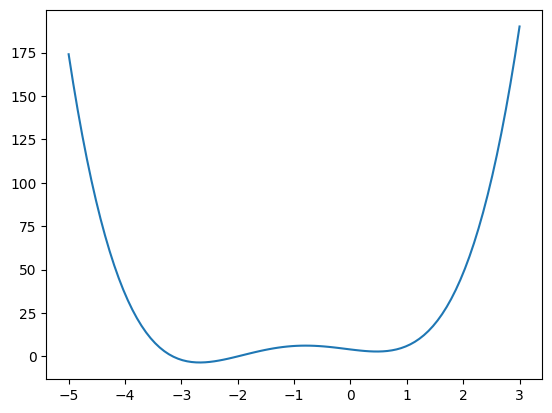

In [74]:
def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = subplots()
x = linspace(-5, 3, 100)
ax.plot(x, f(x));

In [75]:
x_min = optimize.fmin_bfgs(f, -0.5)
x_min


Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 12
         Gradient evaluations: 6


array([0.46961743])

## Statistics

In [76]:
from scipy import stats

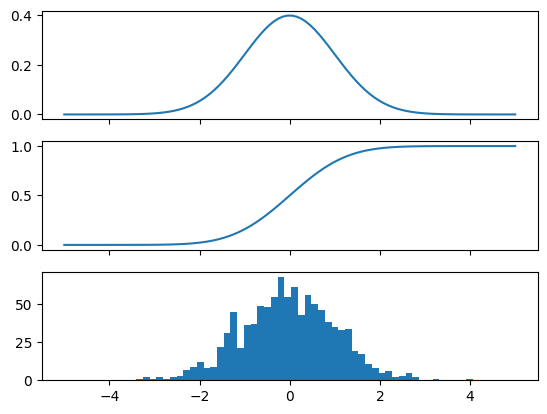

In [77]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

x = linspace(-5,5,100)

fig, axes = subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [78]:
Y.mean(), Y.std(), Y.var()

(0.0, 1.0, 1.0)

In [79]:
# t-test example
t_statistic, p_value = stats.ttest_ind(Y.rvs(size=1000), Y.rvs(size=1000))
t_statistic, p_value

(0.8671806520326258, 0.38594716770033743)